<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>

# Neural Network Framework (Keras)

## *Data Science Unit 4 Sprint 2 Assignment 3*

## Use the Keras Library to build a Multi-Layer Perceptron Model on the Boston Housing dataset

- The Boston Housing dataset comes with the Keras library so use Keras to import it into your notebook. 
- Normalize the data (all features should have roughly the same scale)
- Import the type of model and layers that you will need from Keras.
- Instantiate a model object and use `model.add()` to add layers to your model
- Since this is a regression model you will have a single output node in the final layer.
- Use activation functions that are appropriate for this task
- Compile your model
- Fit your model and report its accuracy in terms of Mean Squared Error
- Use the history object that is returned from model.fit to make graphs of the model's loss or train/validation accuracies by epoch. 
- Run this same data through a linear regression model. Which achieves higher accuracy?
- Do a little bit of feature engineering and see how that affects your neural network model. (you will need to change your model to accept more inputs)
- After feature engineering, which model sees a greater accuracy boost due to the new features?

In [1]:
from tensorflow.keras.datasets import boston_housing

In [39]:
(X_train, y_train), (X_test, y_test) = boston_housing.load_data()

In [3]:
y_train

array([15.2, 42.3, 50. , 21.1, 17.7, 18.5, 11.3, 15.6, 15.6, 14.4, 12.1,
       17.9, 23.1, 19.9, 15.7,  8.8, 50. , 22.5, 24.1, 27.5, 10.9, 30.8,
       32.9, 24. , 18.5, 13.3, 22.9, 34.7, 16.6, 17.5, 22.3, 16.1, 14.9,
       23.1, 34.9, 25. , 13.9, 13.1, 20.4, 20. , 15.2, 24.7, 22.2, 16.7,
       12.7, 15.6, 18.4, 21. , 30.1, 15.1, 18.7,  9.6, 31.5, 24.8, 19.1,
       22. , 14.5, 11. , 32. , 29.4, 20.3, 24.4, 14.6, 19.5, 14.1, 14.3,
       15.6, 10.5,  6.3, 19.3, 19.3, 13.4, 36.4, 17.8, 13.5, 16.5,  8.3,
       14.3, 16. , 13.4, 28.6, 43.5, 20.2, 22. , 23. , 20.7, 12.5, 48.5,
       14.6, 13.4, 23.7, 50. , 21.7, 39.8, 38.7, 22.2, 34.9, 22.5, 31.1,
       28.7, 46. , 41.7, 21. , 26.6, 15. , 24.4, 13.3, 21.2, 11.7, 21.7,
       19.4, 50. , 22.8, 19.7, 24.7, 36.2, 14.2, 18.9, 18.3, 20.6, 24.6,
       18.2,  8.7, 44. , 10.4, 13.2, 21.2, 37. , 30.7, 22.9, 20. , 19.3,
       31.7, 32. , 23.1, 18.8, 10.9, 50. , 19.6,  5. , 14.4, 19.8, 13.8,
       19.6, 23.9, 24.5, 25. , 19.9, 17.2, 24.6, 13

In [17]:
import seaborn as sns

In [20]:
import numpy as np

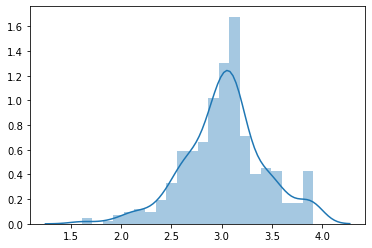

In [24]:
sns.distplot(np.log(y_train))

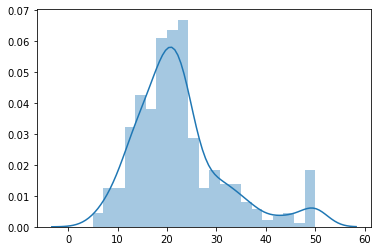

In [23]:
sns.distplot(y_train);

In [4]:
from sklearn.preprocessing import Normalizer

In [111]:
normalizer = Normalizer()
X_train = normalizer.fit_transform(X_train, y_train)
X_test = normalizer.transform(X_test)

In [35]:
X_train.shape

(404, 13)

In [7]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [103]:
from tensorflow.keras.callbacks import EarlyStopping

In [120]:
model = Sequential([
    Dense(13, input_dim=13, activation='relu'),
    Dense(6, activation='relu'),
    Dense(3, activation='relu'),
    Dense(1, activation='linear')
])

In [121]:
model.compile(optimizer='nadam', loss='mean_absolute_error', metrics=['mean_squared_error'])

In [122]:
stop = EarlyStopping(monitor='val_mean_squared_error',
                     min_delta=0.01,
                     patience=3)

In [123]:
model.fit(X_train, y_train,
          epochs=999,
          verbose=1,
          validation_data=(X_test,y_test),
          callbacks=[stop])

Train on 404 samples, validate on 102 samples
Epoch 1/999
404/404 [==============================] - 1s 2ms/sample - loss: 22.3867 - mean_squared_error: 585.7935 - val_loss: 23.0553 - val_mean_squared_error: 614.7875
Epoch 2/999
404/404 [==============================] - 0s 126us/sample - loss: 22.3593 - mean_squared_error: 584.5558 - val_loss: 23.0264 - val_mean_squared_error: 613.4471
Epoch 3/999
404/404 [==============================] - 0s 92us/sample - loss: 22.3282 - mean_squared_error: 583.1483 - val_loss: 22.9925 - val_mean_squared_error: 611.8857
Epoch 4/999
404/404 [==============================] - 0s 87us/sample - loss: 22.2925 - mean_squared_error: 581.5775 - val_loss: 22.9543 - val_mean_squared_error: 610.1372
Epoch 5/999
404/404 [==============================] - 0s 96us/sample - loss: 22.2524 - mean_squared_error: 579.7782 - val_loss: 22.9117 - val_mean_squared_error: 608.1878
Epoch 6/999
404/404 [==============================] - 0s 92us/sample - loss: 22.2073 - mean_s

404/404 [==============================] - 0s 134us/sample - loss: 5.9880 - mean_squared_error: 77.5268 - val_loss: 6.2373 - val_mean_squared_error: 79.1492
Epoch 49/999
404/404 [==============================] - 0s 124us/sample - loss: 5.9716 - mean_squared_error: 77.2623 - val_loss: 6.2314 - val_mean_squared_error: 78.9421
Epoch 50/999
404/404 [==============================] - 0s 97us/sample - loss: 5.9506 - mean_squared_error: 76.8761 - val_loss: 6.2230 - val_mean_squared_error: 78.6896
Epoch 51/999
404/404 [==============================] - 0s 97us/sample - loss: 5.9286 - mean_squared_error: 76.8303 - val_loss: 6.2139 - val_mean_squared_error: 78.4263
Epoch 52/999
404/404 [==============================] - 0s 84us/sample - loss: 5.9064 - mean_squared_error: 76.4086 - val_loss: 6.2011 - val_mean_squared_error: 78.0755
Epoch 53/999
404/404 [==============================] - 0s 89us/sample - loss: 5.8884 - mean_squared_error: 76.3006 - val_loss: 6.1873 - val_mean_squared_error: 77.69

## Use the Keras Library to build an image recognition network using the Fashion-MNIST dataset (also comes with keras)

- Load and preprocess the image data similar to how we preprocessed the MNIST data in class.
- Make sure to one-hot encode your category labels
- The number of nodes in your output layer should equal the number of classes you want to predict for Fashion-MNIST.
- Try different hyperparameters. What is the highest accuracy that you are able to achieve.
- Use the history object that is returned from model.fit to make graphs of the model's loss or train/validation accuracies by epoch. 
- Remember that neural networks fall prey to randomness so you may need to run your model multiple times (or use Cross Validation) in order to tell if a change to a hyperparameter is truly producing better results.

In [9]:
##### Your Code Here #####

## Stretch Goals:

- Use Hyperparameter Tuning to make the accuracy of your models as high as possible. (error as low as possible)
- Use Cross Validation techniques to get more consistent results with your model.
- Use GridSearchCV to try different combinations of hyperparameters. 
- Start looking into other types of Keras layers for CNNs and RNNs maybe try and build a CNN model for fashion-MNIST to see how the results compare.